In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [168]:
df1 = pd.read_csv('C:/Users/USER/OneDrive/Documents/UM COURSE/PRINCIPLE OF DATA SCIENCE/assigment/student/student-mat.csv', sep=';')
df2 = pd.read_csv('C:/Users/USER/OneDrive/Documents/UM COURSE/PRINCIPLE OF DATA SCIENCE/assigment/student/student-por.csv', sep=';')

In [169]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [170]:
df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


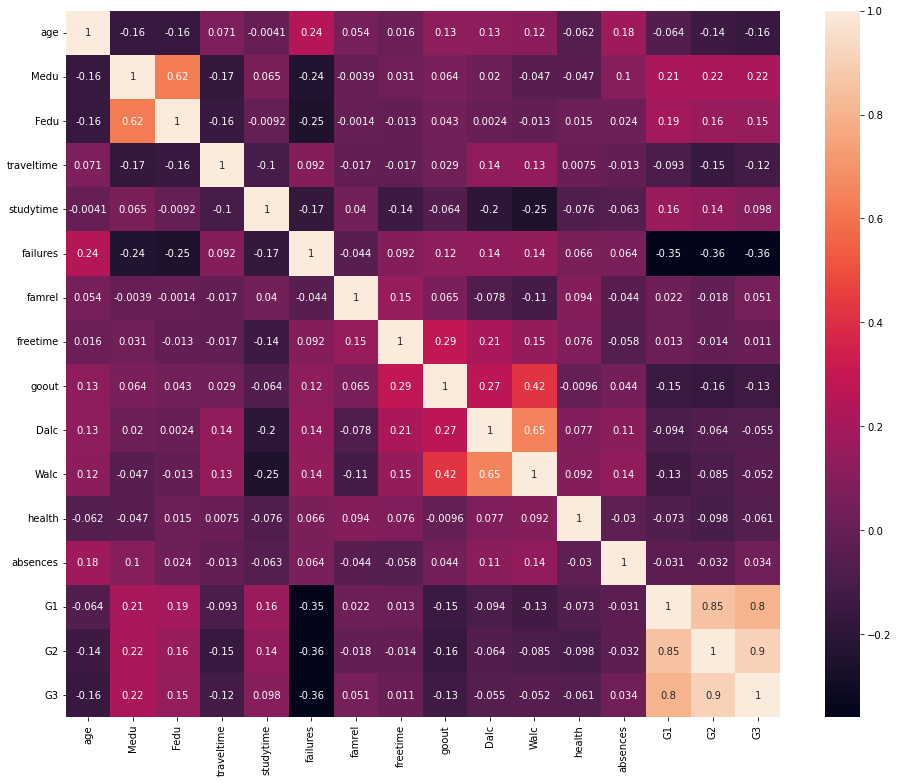

In [171]:
fig , ax = plt.subplots(figsize = (16,13))
sn.heatmap(df1.corr(), annot=True)
plt.show()

In [172]:
df1.drop(columns=['G1'], inplace=True)  # G1 and G2 are correlated with G3 thus redundant columns
df2.drop(columns=['G1'], inplace=True)

In [173]:
df1['math'] = 1
df2['portuguese'] = 1

In [174]:
len(df1)

395

In [175]:
len(df2)

649

In [176]:
df = pd.concat([df1, df2])

In [177]:
df.fillna(0, inplace = True)

In [178]:
df.to_csv('C:/Users/USER/OneDrive/Documents/UM COURSE/PRINCIPLE OF DATA SCIENCE/assigment/student/preprocessed_dataset.csv')

In [179]:
df.shape

(1044, 34)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1044 non-null   int64  
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1044 non-null   int64  
 7   Fedu        1044 non-null   int64  
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    1044 non-null   object 
 12  traveltime  1044 non-null   int64  
 13  studytime   1044 non-null   int64  
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nursery     1044 non-null   

In [181]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(df[column].value_counts())
        print('==='*20)

GP    772
MS    272
Name: school, dtype: int64
F    591
M    453
Name: sex, dtype: int64
U    759
R    285
Name: address, dtype: int64
GT3    738
LE3    306
Name: famsize, dtype: int64
T    923
A    121
Name: Pstatus, dtype: int64
other       399
services    239
at_home     194
teacher     130
health       82
Name: Mjob, dtype: int64
other       584
services    292
teacher      65
at_home      62
health       41
Name: Fjob, dtype: int64
course        430
home          258
reputation    248
other         108
Name: reason, dtype: int64
mother    728
father    243
other      73
Name: guardian, dtype: int64
no     925
yes    119
Name: schoolsup, dtype: int64
yes    640
no     404
Name: famsup, dtype: int64
no     824
yes    220
Name: paid, dtype: int64
no     528
yes    516
Name: activities, dtype: int64
yes    835
no     209
Name: nursery, dtype: int64
yes    955
no      89
Name: higher, dtype: int64
yes    827
no     217
Name: internet, dtype: int64
no     673
yes    371
Name: romantic, 

In [182]:
columns = ['romantic', 'internet', 'higher', 'nursery', 'activities', 'paid', 'famsup', 'schoolsup']

In [183]:
for column in columns:
    df[column].replace('yes', 1, inplace=True)
    df[column].replace('no', 0, inplace=True)

In [184]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G2,G3,math,portuguese
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,6,6,1.0,0.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,6,1.0,0.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,8,10,1.0,0.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,14,15,1.0,0.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,10,10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,11,10,0.0,1.0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,16,0.0,1.0
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,12,9,0.0,1.0
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,0.0,1.0


In [185]:
df_backup = df.copy()
df.drop(columns=['school', 'reason', 'failures','math','portuguese'], inplace = True)

In [186]:
df['sex'].replace('F', 1, inplace=True)
df['sex'].replace('M', 0, inplace=True)
df['address'].replace('U', 1, inplace=True)
df['address'].replace('R', 0, inplace=True)
df['famsize'].replace('GT3', 1, inplace=True)
df['famsize'].replace('LE3', 0, inplace=True)
df['Pstatus'].replace('T', 1, inplace=True)
df['Pstatus'].replace('A', 0, inplace=True)

In [187]:
test_df = pd.get_dummies(df, columns=[ 'Fjob', 'Mjob', 'guardian'])

In [188]:
test_df

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,schoolsup,...,Fjob_services,Fjob_teacher,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,guardian_father,guardian_mother,guardian_other
0,1,18,1,1,0,4,4,2,2,1,...,0,1,1,0,0,0,0,0,1,0
1,1,17,1,1,1,1,1,1,2,0,...,0,0,1,0,0,0,0,1,0,0
2,1,15,1,0,1,1,1,1,2,1,...,0,0,1,0,0,0,0,0,1,0
3,1,15,1,1,1,4,2,1,3,0,...,1,0,0,1,0,0,0,0,1,0
4,1,16,1,1,1,3,3,1,2,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,19,0,1,1,2,3,1,3,0,...,0,0,0,0,0,1,0,0,1,0
645,1,18,1,0,1,3,1,1,2,0,...,1,0,0,0,0,0,1,0,1,0
646,1,18,1,1,1,1,1,2,2,0,...,0,0,0,0,1,0,0,0,1,0
647,0,17,1,0,1,3,1,2,1,0,...,1,0,0,0,0,1,0,0,1,0


In [189]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   sex              1044 non-null   int64
 1   age              1044 non-null   int64
 2   address          1044 non-null   int64
 3   famsize          1044 non-null   int64
 4   Pstatus          1044 non-null   int64
 5   Medu             1044 non-null   int64
 6   Fedu             1044 non-null   int64
 7   traveltime       1044 non-null   int64
 8   studytime        1044 non-null   int64
 9   schoolsup        1044 non-null   int64
 10  famsup           1044 non-null   int64
 11  paid             1044 non-null   int64
 12  activities       1044 non-null   int64
 13  nursery          1044 non-null   int64
 14  higher           1044 non-null   int64
 15  internet         1044 non-null   int64
 16  romantic         1044 non-null   int64
 17  famrel           1044 non-null   int64
 18  freetime 

In [190]:
test_df['Pstatus'].replace('T', 1, inplace=True)
test_df['Pstatus'].replace('A', 0, inplace=True)
test_df['Pstatus'].replace('T', 1, inplace=True)
test_df['Pstatus'].replace('A', 0, inplace=True)

In [191]:
test_df.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G2', 'G3',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'guardian_father', 'guardian_mother',
       'guardian_other'],
      dtype='object')

In [192]:
df = test_df.copy()
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,schoolsup,...,Fjob_services,Fjob_teacher,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,guardian_father,guardian_mother,guardian_other
0,1,18,1,1,0,4,4,2,2,1,...,0,1,1,0,0,0,0,0,1,0
1,1,17,1,1,1,1,1,1,2,0,...,0,0,1,0,0,0,0,1,0,0
2,1,15,1,0,1,1,1,1,2,1,...,0,0,1,0,0,0,0,0,1,0
3,1,15,1,1,1,4,2,1,3,0,...,1,0,0,1,0,0,0,0,1,0
4,1,16,1,1,1,3,3,1,2,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,19,0,1,1,2,3,1,3,0,...,0,0,0,0,0,1,0,0,1,0
645,1,18,1,0,1,3,1,1,2,0,...,1,0,0,0,0,0,1,0,1,0
646,1,18,1,1,1,1,1,2,2,0,...,0,0,0,0,1,0,0,0,1,0
647,0,17,1,0,1,3,1,2,1,0,...,1,0,0,0,0,1,0,0,1,0


In [193]:
df.to_csv('C:/Users/USER/OneDrive/Documents/UM COURSE/PRINCIPLE OF DATA SCIENCE/assigment/student/preprocessed.csv', index = False)